In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#session.query(Ticker).order_by(desc('updated')).first()
recentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentDate

('2017-08-23',)

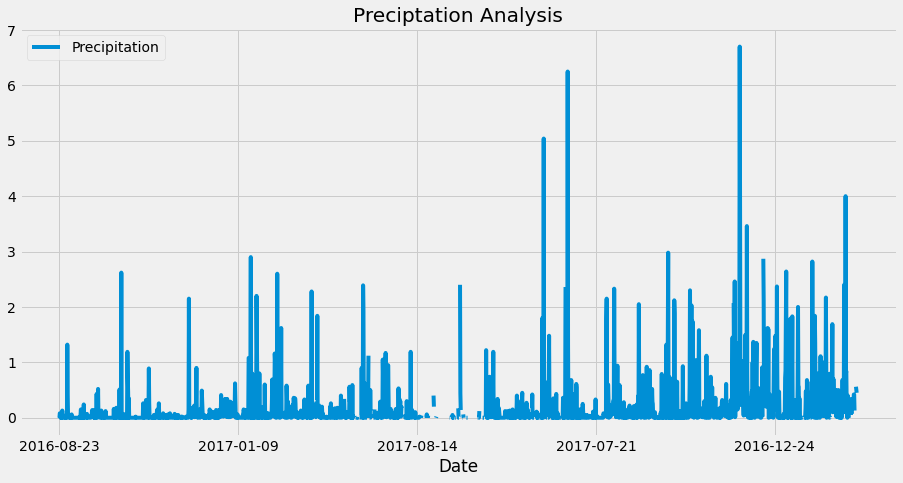

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prcpData = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
filter(Measurement.date <= '2017-08-23').all()
prcpData

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneYear = pd.DataFrame(prcpData)
oneYear.head(365)
# 2016-08-23
# Perform a query to retrieve the data and precipitation scores
prcpScores = pd.DataFrame(prcpData)
prcpScores

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpScores = pd.DataFrame(prcpData, columns=['Date', 'Precipitation'])
prcpScores

# Sort the dataframe by date
prcpScores.set_index('Date', inplace=True)
prcpScores.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcpScores.plot(title='Preciptation Analysis', figsize=(14,7))
plt.legend(loc='upper left')
plt.savefig('precipitation.png')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpScores.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationCT = session.query(Measurement.station).distinct().count()
stationCT

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = [func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)]

tempStats = session.query(*stats).\
filter(Measurement.station == 'USC00519281').all()
tempStats

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#lastYear = dt.datetime.strptime(recentDate, '%Y-%m-%d') - dt.timedelta(days=365)

tobsData = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == activeStations).\
filter(Measurement.date >= oneYear).\
group_by(Measurement.date).all()




InterfaceError: (sqlite3.InterfaceError) Error binding parameter 0 - probably unsupported type.
[SQL: SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ? GROUP BY measurement.date]
[parameters: ([('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)],                0     1
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns])]
(Background on this error at: http://sqlalche.me/e/14/rvf5)

In [ ]:
# Close session

In [ ]:
# Close Session
session.close()